In [7]:
# 맨하튼 주택 임대료
# 다양한 독립변수로 종속변수인 rent 값을 예측하는 모델학습.
!pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("../dataset/streeteasy/manhattan.csv")
print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

In [8]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000,3539.000000
mean,5332.589997,5138.940379,1.351936,1.366770,939.727324,4.970896,11.908307,51.994914,0.403504,0.154846,0.160215,0.281153,0.294716,0.185646,0.055100,0.174908
std,3311.552136,3162.824760,0.967595,0.599588,477.949074,5.513589,10.960893,39.380433,0.490669,0.361809,0.366857,0.449625,0.455979,0.388875,0.228208,0.379942
min,1.000000,1300.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2443.500000,3150.000000,1.000000,1.000000,613.000000,2.000000,4.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5128.000000,4000.000000,1.000000,1.000000,800.000000,4.000000,8.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8149.500000,6000.000000,2.000000,2.000000,1141.000000,6.000000,17.000000,90.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,11349.000000,20000.000000,5.000000,5.000000,4800.000000,43.000000,83.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


In [10]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [11]:
x = df[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym']]
y = df[['rent']]
# 학습 데이터, 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape

(2831, 14)

In [12]:
# 모델 학습
model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_) # 기울기
print(model.intercept_) # 기울기 

[[-294.34271675 1230.15210833    4.87969445  -16.44046135   26.21105672
    -6.90707664  -92.92841661   34.63909929  105.70199559 -151.9008216
    97.39279598    8.24733526  -36.97946745  -40.52886239]]
[-545.55526555]


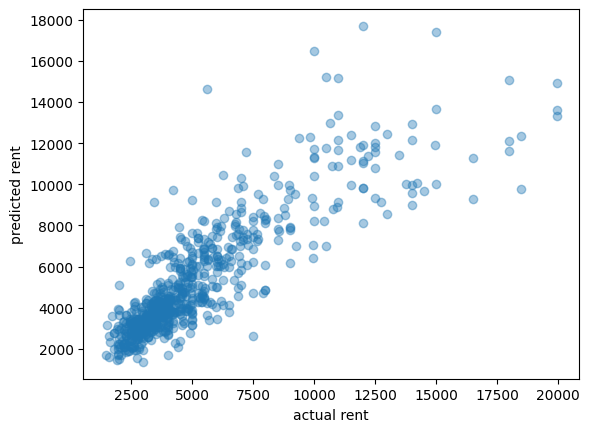

In [14]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('actual rent')
plt.ylabel('predicted rent')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# R^2 스코어(결정계수) 모델이 목표변수의 분산을 얼마나 잘 설명하는지 나타내는 지표
# (14개의 독립변수로) 75.190%의 분산이 모델에 의해 설명된다. (1에 가까울수록 데이터를 잘 설명한다는 의미)
print('R^2 score:',r2)
print('mse error:',mse)

R^2 score: 0.7385429027400834
mse error: 2526507.865322677


C:\Users\202-13\AppData\Local\Temp\ipykernel_1880\632433272.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\202-13\anaconda3\envs\tech9\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


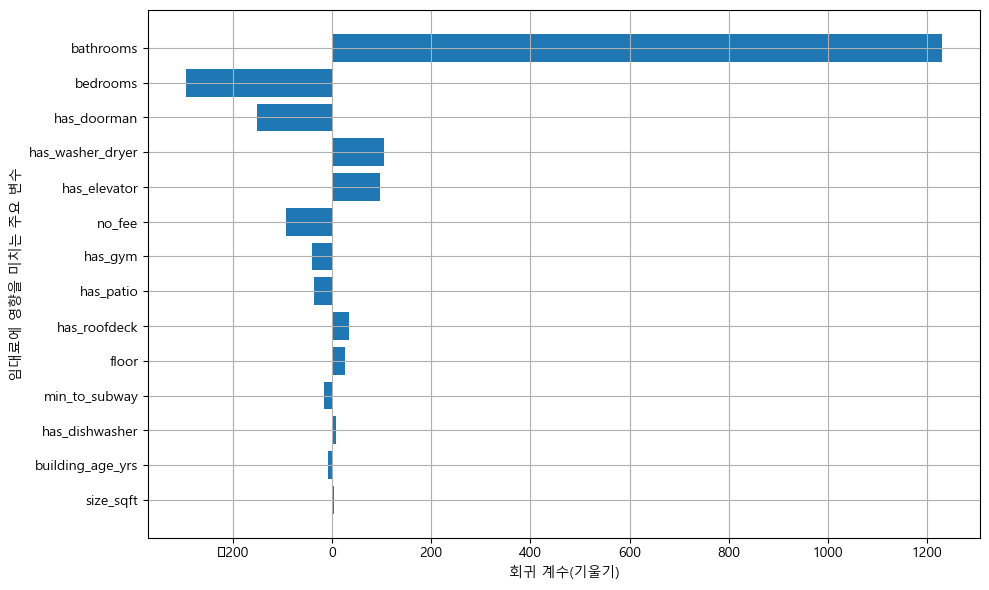

In [19]:
plt.rcParams['font.family'] = 'Malgun Gothic'
coef_df = pd.DataFrame({'feature': x.columns, 'coefficient': model.coef_[0]})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_sorted = coef_df.sort_values(by='abs_coef', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(coef_sorted['feature'], coef_sorted['coefficient'])
plt.xlabel('회귀 계수(기울기)')
plt.ylabel('임대료에 영향을 미치는 주요 변수')
plt.gca().invert_yaxis() # 큰 영향이 위로 가도록
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
import numpy as np
num_samples = 5 # 임의로 5개
random_idx = np.random.choice(x_test.index, size=num_samples, replace=False)
x_sample = x_test.loc[random_idx]
y_sample_actual = y_test.loc[random_idx]
# 선택한 샘플로 예측
y_sample_pred = model.predict(x_sample)
for i in range(num_samples):
    print(f"샘플 {i+ 1}")
    print(f"실제 임대료: {y_sample_actual.iloc[i].values[0]}")
    print(f"예측 임대료: {y_sample_pred[i]}")

샘플 1
실제 임대료: 2750
예측 임대료: [2553.1511865]
샘플 2
실제 임대료: 3500
예측 임대료: [3868.44514564]
샘플 3
실제 임대료: 4195
예측 임대료: [6458.981631]
샘플 4
실제 임대료: 3400
예측 임대료: [4280.15758994]
샘플 5
실제 임대료: 8975
예측 임대료: [9988.69597572]


In [28]:
import pickle
# 파이썬 객체를 직렬화 하고 역직렬화하는데 사용되는 라이브러리
# 직렬화 : 파이썬 객체를 바이트 스트림 형태로 변환
# 역직렬화 : 바이트 스트림을 객체로 복원

# 학습된 모델 저장
with open("manhattan_model.pk1", 'wb') as f:
    pickle.dump(model, f)
print("model save!")


model save!
